# Similarity

Similarity between two songs have been defined by Tchernichovski et al (2000). This is a reimplementation of this algorithm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile


Let's first reload two unrelated songs.

In [2]:
sr, sig = wavfile.read('../songs/simple.wav')
sr2, sig2 = wavfile.read('../songs/flashcam.wav')

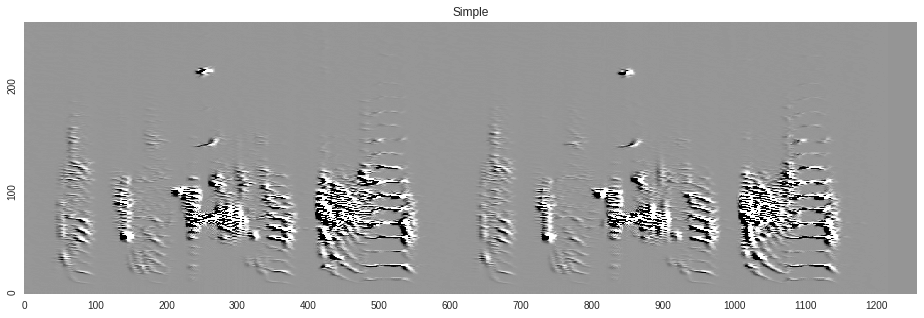

In [3]:
spec_derivs_simple = bsa.spectral_derivs(sig)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs_simple, 0.05, ax)
ax.set_title('Simple')
plt.show(fig)

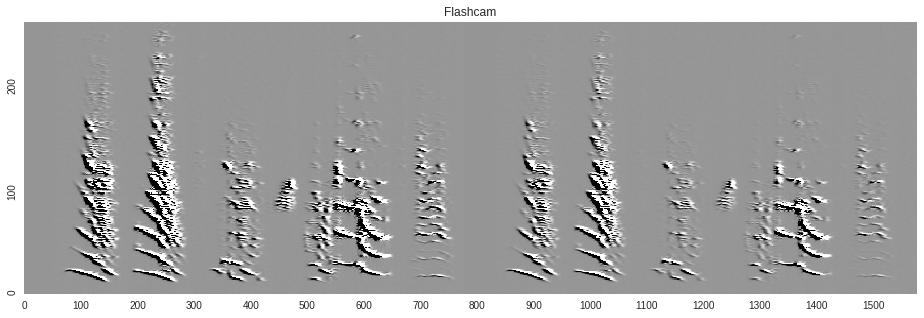

In [4]:
spec_derivs_flash = bsa.spectral_derivs(sig2)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs_flash, 0.01, ax)
ax.set_title('Flashcam')
plt.show(fig)

## Compare their similarity

Let's see if simple could be similar to the reference song flashcam

In [5]:
sim1= bsa.similarity(sig, sig2, threshold=0.05)
print(sim1['similarity'])

0.465175831197


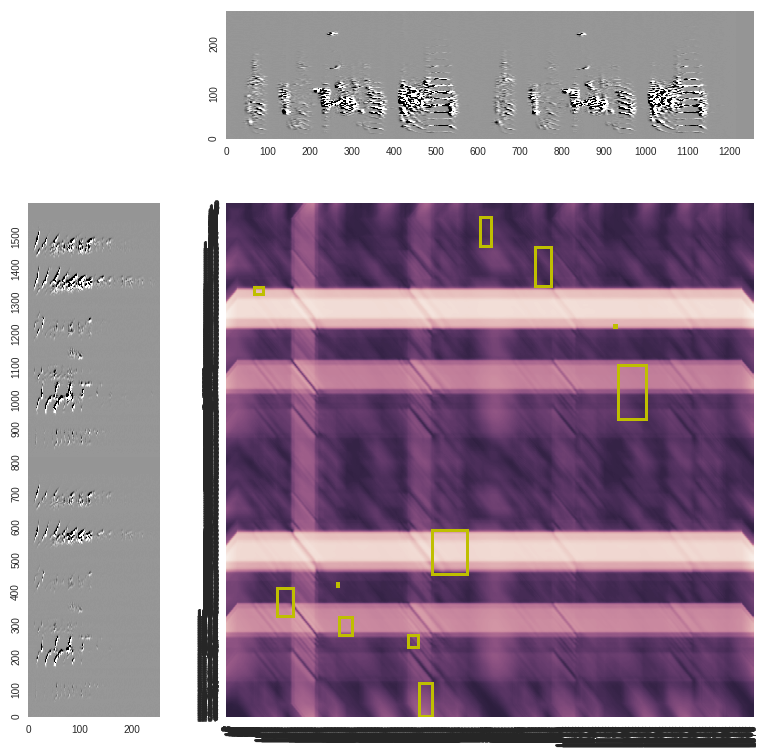

In [6]:
import matplotlib.patches as p
fig, ax = plt.subplots(2, 2, figsize=(13, 13), gridspec_kw = {'width_ratios':[1, 4], 'height_ratios': [1, 4]})
ax[0, 0].axis('off')
ax[0, 1] = bsa.spectral_derivs_plot(spec_derivs_simple, 0.05, ax[0, 1])
ax[1, 0] = bsa.spectral_derivs_plot(np.flip(spec_derivs_flash.T, 1), 0.05, ax[1, 0])
ax[1, 1] = sns.heatmap(sim1['glob_matrix'], ax=ax[1, 1], cbar=False)
for section in sim1['sections']:
    xy = (section['beg'][0], sim1['glob_matrix'].shape[1] - section['end'][1])
    width = section['end'][0] - section['beg'][0]
    height = section['end'][1] - section['beg'][1]
    ax[1, 1].add_patch(p.Rectangle(xy, width, height, fill=False, edgecolor='y', linewidth=3))

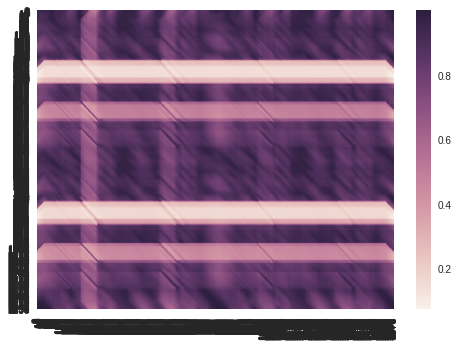

In [7]:
sns.heatmap(sim1['glob_matrix'])

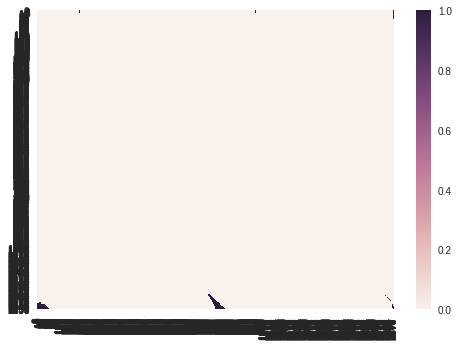

In [8]:
sns.heatmap(sim1['glob_matrix'] > 0.99)

As we can see, simple is similar to samba only by 50%.

Is simple similar to itself?


In [9]:
sim = bsa.similarity(sig, sig, threshold=0.05)
print(sim['similarity'])

0.999901837223


Simple is similar to itself at 99%.

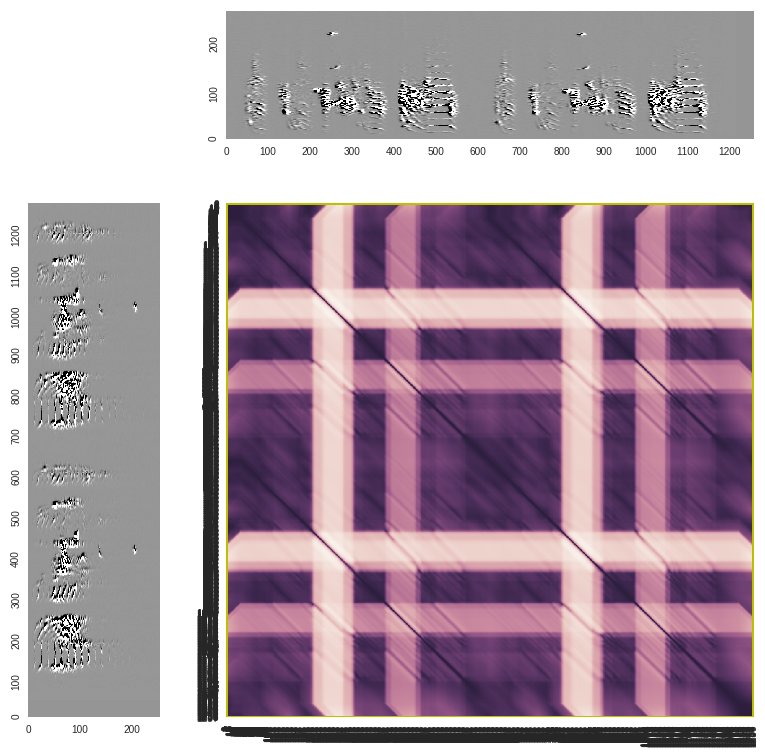

In [10]:
import matplotlib.patches as p
fig, ax = plt.subplots(2, 2, figsize=(13, 13), gridspec_kw = {'width_ratios':[1, 4], 'height_ratios': [1, 4]})
ax[0, 0].axis('off')
ax[0, 1] = bsa.spectral_derivs_plot(spec_derivs_simple, 0.05, ax[0, 1])
ax[1, 0] = bsa.spectral_derivs_plot(np.flip(spec_derivs_simple.T, 1), 0.05, ax[1, 0])
ax[1, 1] = sns.heatmap(sim['glob_matrix'], ax=ax[1, 1], cbar=False)
for section in sim['sections']:
    xy = (section['beg'][0], sim['glob_matrix'].shape[1] - section['end'][1])
    width = section['end'][0] - section['beg'][0]
    height = section['end'][1] - section['beg'][1]
    ax[1, 1].add_patch(p.Rectangle(xy, width, height, fill=False, edgecolor='y', linewidth=3))

# Comparison between bells and a reproduction

In [11]:
sr, bells = wavfile.read('../songs/bells.wav')
sr, bells_rep = wavfile.read('../songs/bells_reproduction.wav')

In [12]:
spec_derivs_rep = bsa.spectral_derivs(bells_rep)
spec_derivs_bells = bsa.spectral_derivs(bells)

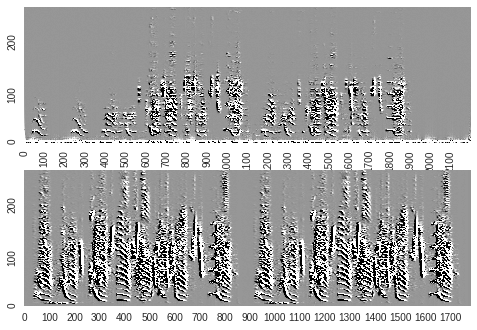

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bsa.spectral_derivs_plot(spec_derivs_rep, 0.01, ax=ax1)
bsa.spectral_derivs_plot(spec_derivs_bells, 0.01, ax=ax2)

In [ ]:
simrep = bsa.similarity(bells_rep, bells, threshold=0.05)
print(simrep['similarity'])

In [ ]:
import matplotlib.patches as p
fig, ax = plt.subplots(2, 2, figsize=(13, 13), gridspec_kw = {'width_ratios':[1, 4], 'height_ratios': [1, 4]})
ax[0, 0].axis('off')
ax[0, 1] = bsa.spectral_derivs_plot(spec_derivs_rep, 0.05, ax[0, 1])
ax[1, 0] = bsa.spectral_derivs_plot(np.flip(spec_derivs_bells.T, 1), 0.05, ax[1, 0])
ax[1, 1] = sns.heatmap(simrep['glob_matrix'], ax=ax[1, 1], cbar=False)
for section in simrep['sections']:
    xy = (section['beg'][0], simrep['glob_matrix'].shape[1] - section['end'][1])
    width = section['end'][0] - section['beg'][0]
    height = section['end'][1] - section['beg'][1]
    ax[1, 1].add_patch(p.Rectangle(xy, width, height, fill=False, edgecolor='y', linewidth=3))

In [ ]:
sns.heatmap(simrep['sim_matrix'], cbar=False)

In [ ]:
sns.heatmap(simrep['glob_matrix'] > 0.99, cbar=False)